<a href="https://colab.research.google.com/github/truc-h-nguyen/Toddler-activity-suggestions/blob/main/A_Load_images_from_COCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
!wget http://images.cocodataset.org/zips/train2017.zip

--2021-11-04 22:24:50--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.0.173
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.0.173|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  65.9MB/s    in 6m 2s   

2021-11-04 22:30:52 (51.0 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [3]:
!unzip train2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: train2017/000000259556.jpg  
 extracting: train2017/000000381931.jpg  
 extracting: train2017/000000569592.jpg  
 extracting: train2017/000000229396.jpg  
 extracting: train2017/000000488990.jpg  
 extracting: train2017/000000348684.jpg  
 extracting: train2017/000000234031.jpg  
 extracting: train2017/000000563584.jpg  
 extracting: train2017/000000276069.jpg  
 extracting: train2017/000000401194.jpg  
 extracting: train2017/000000502089.jpg  
 extracting: train2017/000000192183.jpg  
 extracting: train2017/000000425127.jpg  
 extracting: train2017/000000126766.jpg  
 extracting: train2017/000000324161.jpg  
 extracting: train2017/000000452746.jpg  
 extracting: train2017/000000423782.jpg  
 extracting: train2017/000000546343.jpg  
 extracting: train2017/000000249290.jpg  
 extracting: train2017/000000025529.jpg  
 extracting: train2017/000000316928.jpg  
 extracting: train2017/000000337866.jpg  
 extracting: train2017/00

In [4]:
!rm train2017.zip

In [5]:
!wget http://images.cocodataset.org/zips/val2017.zip

--2021-11-04 22:37:30--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.64.240
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.64.240|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  77.3MB/s    in 11s     

2021-11-04 22:37:41 (71.8 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [6]:
!unzip val2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2017/000000212226.jpg  
 extracting: val2017/000000231527.jpg  
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/00000011

In [7]:
!rm val2017.zip

In [8]:
!wget http://images.cocodataset.org/zips/test2017.zip

--2021-11-04 22:37:49--  http://images.cocodataset.org/zips/test2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.24.204
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.24.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6646970404 (6.2G) [application/zip]
Saving to: ‘test2017.zip’

test2017.zip        100%[===================>]   6.19G  66.2MB/s    in 1m 40s  

2021-11-04 22:39:29 (63.3 MB/s) - ‘test2017.zip’ saved [6646970404/6646970404]



In [9]:
!unzip test2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: test2017/000000251604.jpg  
 extracting: test2017/000000145034.jpg  
 extracting: test2017/000000234833.jpg  
 extracting: test2017/000000025927.jpg  
 extracting: test2017/000000393116.jpg  
 extracting: test2017/000000536478.jpg  
 extracting: test2017/000000365460.jpg  
 extracting: test2017/000000089887.jpg  
 extracting: test2017/000000274928.jpg  
 extracting: test2017/000000310028.jpg  
 extracting: test2017/000000229793.jpg  
 extracting: test2017/000000394339.jpg  
 extracting: test2017/000000564538.jpg  
 extracting: test2017/000000440585.jpg  
 extracting: test2017/000000541512.jpg  
 extracting: test2017/000000395525.jpg  
 extracting: test2017/000000235435.jpg  
 extracting: test2017/000000069964.jpg  
 extracting: test2017/000000131962.jpg  
 extracting: test2017/000000281392.jpg  
 extracting: test2017/000000534893.jpg  
 extracting: test2017/000000128676.jpg  
 extracting: test2017/000000187639.jpg  
 extra

In [10]:
!rm test2017.zip

In [11]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2021-11-04 22:41:44--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.145.131
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.145.131|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  76.4MB/s    in 3.2s    

2021-11-04 22:41:47 (76.4 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [12]:
!unzip annotations_trainval2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [ ]:
!rm annotations_trainval2017.zip

In [14]:
!ls

annotations  sample_data  test2017  train2017  val2017


In [15]:
!pip install gluoncv

     |████████████████████████████████| 1.3 MB 28.2 MB/s 


In [ ]:
!pip install mxnet

In [ ]:
from gluoncv import data, utils
from matplotlib import pyplot as plt

In [18]:
train_dataset = data.COCODetection('.',splits=['instances_train2017'])
val_dataset = data.COCODetection('.',splits=['instances_val2017'])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

loading annotations into memory...
Done (t=19.45s)
creating index...
index created!
loading annotations into memory...
Done (t=0.50s)
creating index...
index created!
Num of training images: 117266
Num of validation images: 4952


# Preprocessing: 

In [54]:
#Names of classes in dataset:
train_dataset.classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [44]:
#The second picture in the train dataset:
train_dataset[1]

(
 [[[  8   9   4]
   [  8   9   4]
   [  7   8   3]
   ...
   [ 59  60  64]
   [ 58  57  65]
   [ 71  69  80]]
 
  [[  8   9   4]
   [  8   9   4]
   [  7   8   3]
   ...
   [151 150 155]
   [148 147 153]
   [150 149 157]]
 
  [[  8   9   4]
   [  7   8   3]
   [  7   8   3]
   ...
   [187 187 189]
   [180 179 184]
   [172 171 176]]
 
  ...
 
  [[191 189  86]
   [174 166  68]
   [148 132  44]
   ...
   [154 120  93]
   [140 106  78]
   [133 100  69]]
 
  [[192 186  92]
   [154 159  69]
   [137 134  39]
   ...
   [126  96  72]
   [145 115  91]
   [139 109  83]]
 
  [[136 129  38]
   [119 123  36]
   [120 117  24]
   ...
   [127  97  73]
   [145 115  91]
   [139 109  83]]]
 <NDArray 426x640x3 @cpu(0)>, array([[385.53,  60.03, 599.5 , 356.19,  23.  ],
        [ 53.01, 356.49, 184.04, 410.68,  23.  ]]))

From the code above, we know that the second image has a size of 426x640 pixels, 3 color channel RGB.

We have 2 bounding boxes but with the same labels no.24 which is giraffe in COCO dataset (check [here](https://github.com/pjreddie/darknet/blob/master/data/coco.names) for COCO's IDs)

We will show picture of the second image of COCO's train set.

In [60]:
train_image, train_label = train_dataset[1]
#train_label includes information of bounding boxes: x_min, y_min, x_max, y_max, labels
print("Bounding boxes: x_min, y_min, x_max, y_max, labels: \n", train_label)
#train_image includes information of the image: matrix??, shape
print("Image information:", train_image) 

Bounding boxes: x_min, y_min, x_max, y_max, labels: 
 [[385.53  60.03 599.5  356.19  23.  ]
 [ 53.01 356.49 184.04 410.68  23.  ]]
Image information: 
[[[  8   9   4]
  [  8   9   4]
  [  7   8   3]
  ...
  [ 59  60  64]
  [ 58  57  65]
  [ 71  69  80]]

 [[  8   9   4]
  [  8   9   4]
  [  7   8   3]
  ...
  [151 150 155]
  [148 147 153]
  [150 149 157]]

 [[  8   9   4]
  [  7   8   3]
  [  7   8   3]
  ...
  [187 187 189]
  [180 179 184]
  [172 171 176]]

 ...

 [[191 189  86]
  [174 166  68]
  [148 132  44]
  ...
  [154 120  93]
  [140 106  78]
  [133 100  69]]

 [[192 186  92]
  [154 159  69]
  [137 134  39]
  ...
  [126  96  72]
  [145 115  91]
  [139 109  83]]

 [[136 129  38]
  [119 123  36]
  [120 117  24]
  ...
  [127  97  73]
  [145 115  91]
  [139 109  83]]]
<NDArray 426x640x3 @cpu(0)>


In [82]:
#From the train label shape, we know number of detected objects
print("\nTrain label shape:",train_label.shape)
print("=> Number of detected objects:",train_label.shape[0])
print("Image size (height, width, RGB):", train_image.shape)


Train label shape: (2, 5)
=> Number of detected objects: 2
Image size (height, width, RGB): (426, 640, 3)


In [83]:
class_ids = train_label[:,4:5]
print(class_ids)
print("Name of detected objects:", train_dataset.classes[class_ids])

[[23.]
 [23.]]


TypeError: ignored

Drop labels in bounding boxes:
 [[385.53  60.03 599.5  356.19]
 [ 53.01 356.49 184.04 410.68]]


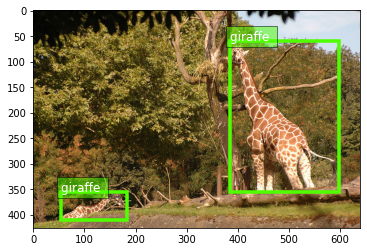

In [84]:
#To avoid "too many values to unpack" error:
bounding_boxes = train_label[:,:4]
print("Drop labels in bounding boxes:\n", bounding_boxes)
#Visualize bounding boxes:
utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes,scores = None,labels=class_ids,class_names=train_dataset.classes)
plt.show()